In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel, default_data_collator
import torch
import torch.nn.functional as F
from datasets import load_dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
import pickle

In [ ]:
from datasets import load_dataset
dataset = load_dataset("/data/home/chenpz/git_clone_project/nlpData/p3/anli_can_we_infer_r3")

In [3]:
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/output.pkl', 'rb') as file:
    o_data = pickle.load(file)
with open('/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/noise_output.pkl', 'rb') as file:
    n_data = pickle.load(file)

In [ ]:
len(o_data[0]['embedding']),len(n_data[0]['embedding'])

In [9]:
o_case1 = np.array(o_data[0]['embedding'])
o_case2 = np.array(o_data[1]['embedding'])
n_case1 = np.array(n_data[0]['embedding'])
n_case2 = np.array(n_data[1]['embedding'])

# different

In [ ]:
np.sqrt(np.sum( (o_case1-n_case1)**2 )/len(o_case1))

In [ ]:
np.sqrt(np.sum( (o_case2-n_case2)**2 )/len(o_case1))

# similarity

In [ ]:
np.dot(o_case1,n_case1),np.dot(o_case2,n_case2)

In [ ]:
np.dot(o_case1,o_case2),np.dot(n_case1,n_case2)

# SEE THE MAX TOKEN LENGTH OF DATA ANLI_R3

In [1]:
from datasets import load_dataset
dataset =  load_dataset("json", data_files='/data/home/chenpz/git_clone_project/jupyter_notebook_test/output/anli_can_we_infer_r3_train.json')

/data/home/chenpz/.conda/envs/llama_factory/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import AutoTokenizer, AutoModel, default_data_collator
from datasets import load_dataset




def preprocess_supervised_data(examples,tokenizer):
    model_inputs = {'input_ids': [],
                    'input_len':[],
                    'attention_mask':[],
                    }
    for  i in examples['question']:
           res = tokenizer(i)
           model_inputs['input_ids'].append(res['input_ids'])
           model_inputs['input_len'].append(len(res['input_ids']))
           model_inputs['attention_mask'].append(res['attention_mask'])
    return model_inputs

model_path ="/data/home/chenpz/git_clone_project/All_base_model/models--meta-llama--Meta-Llama-3-8B-Instruct/snapshots/d3aa29f914761e8ea0298051fbaf8dd173e94db5" 
# model_path ="/data/home/chenpz/git_clone_project/All_base_model/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/44eb4044493a3c34bc6d7faae1a71ec76665ebc6"

tokenizer = AutoTokenizer.from_pretrained(model_path)
dataset2 = dataset.map(lambda examples: preprocess_supervised_data(examples, tokenizer), batched=True, num_proc=4)

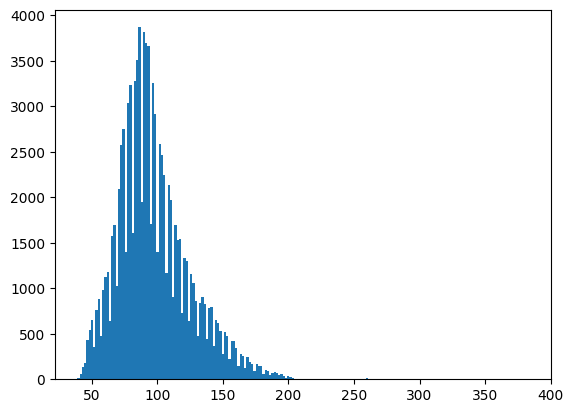

In [6]:
import matplotlib.pyplot as plt
x = plt.hist(dataset2['train']['input_len'],bins=200)

In [ ]:
67.88, 69.75, 67.18, 64.04